# PSYLIQ

## Task 2: Titanic Survival Prediction
### Objective:-
How can I create a system to predict if a person will survive the Titanic sinking and
identify key factors influencing survival like socio-economic status, age, and gender?     
**Dataset:-** https://www.kaggle.com/competitions/titanic/data?select=train.csv

## Importing Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier 
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Loading the Dataset

In [40]:
# Load the dataset into a pandas DataFrame
data_1 = pd.read_csv('/Users/asaifali/Desktop/Internships/Psyliq/DATA SCIENCE - INTERNSHIP/train-2.csv',encoding='ISO-8859-1')

In [12]:
data_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
le = LabelEncoder()

# Fit and transform the categorical column
data_1['Name'] = le.fit_transform(data_1['Name'])
data_1['Sex'] = le.fit_transform(data_1['Sex'])
data_1['Ticket'] = le.fit_transform(data_1['Ticket'])
data_1['Cabin'] = le.fit_transform(data_1['Cabin'])
data_1['Embarked'] = le.fit_transform(data_1['Embarked'])
print(data_1.head())

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500    147         2  
1  71.2833     81         0  
2   7.9250    147         2  
3  53.1000     55         2  
4   8.0500    147         2  


In [42]:
data_1['Age'].fillna(data_1['Age'].median(), inplace=True)

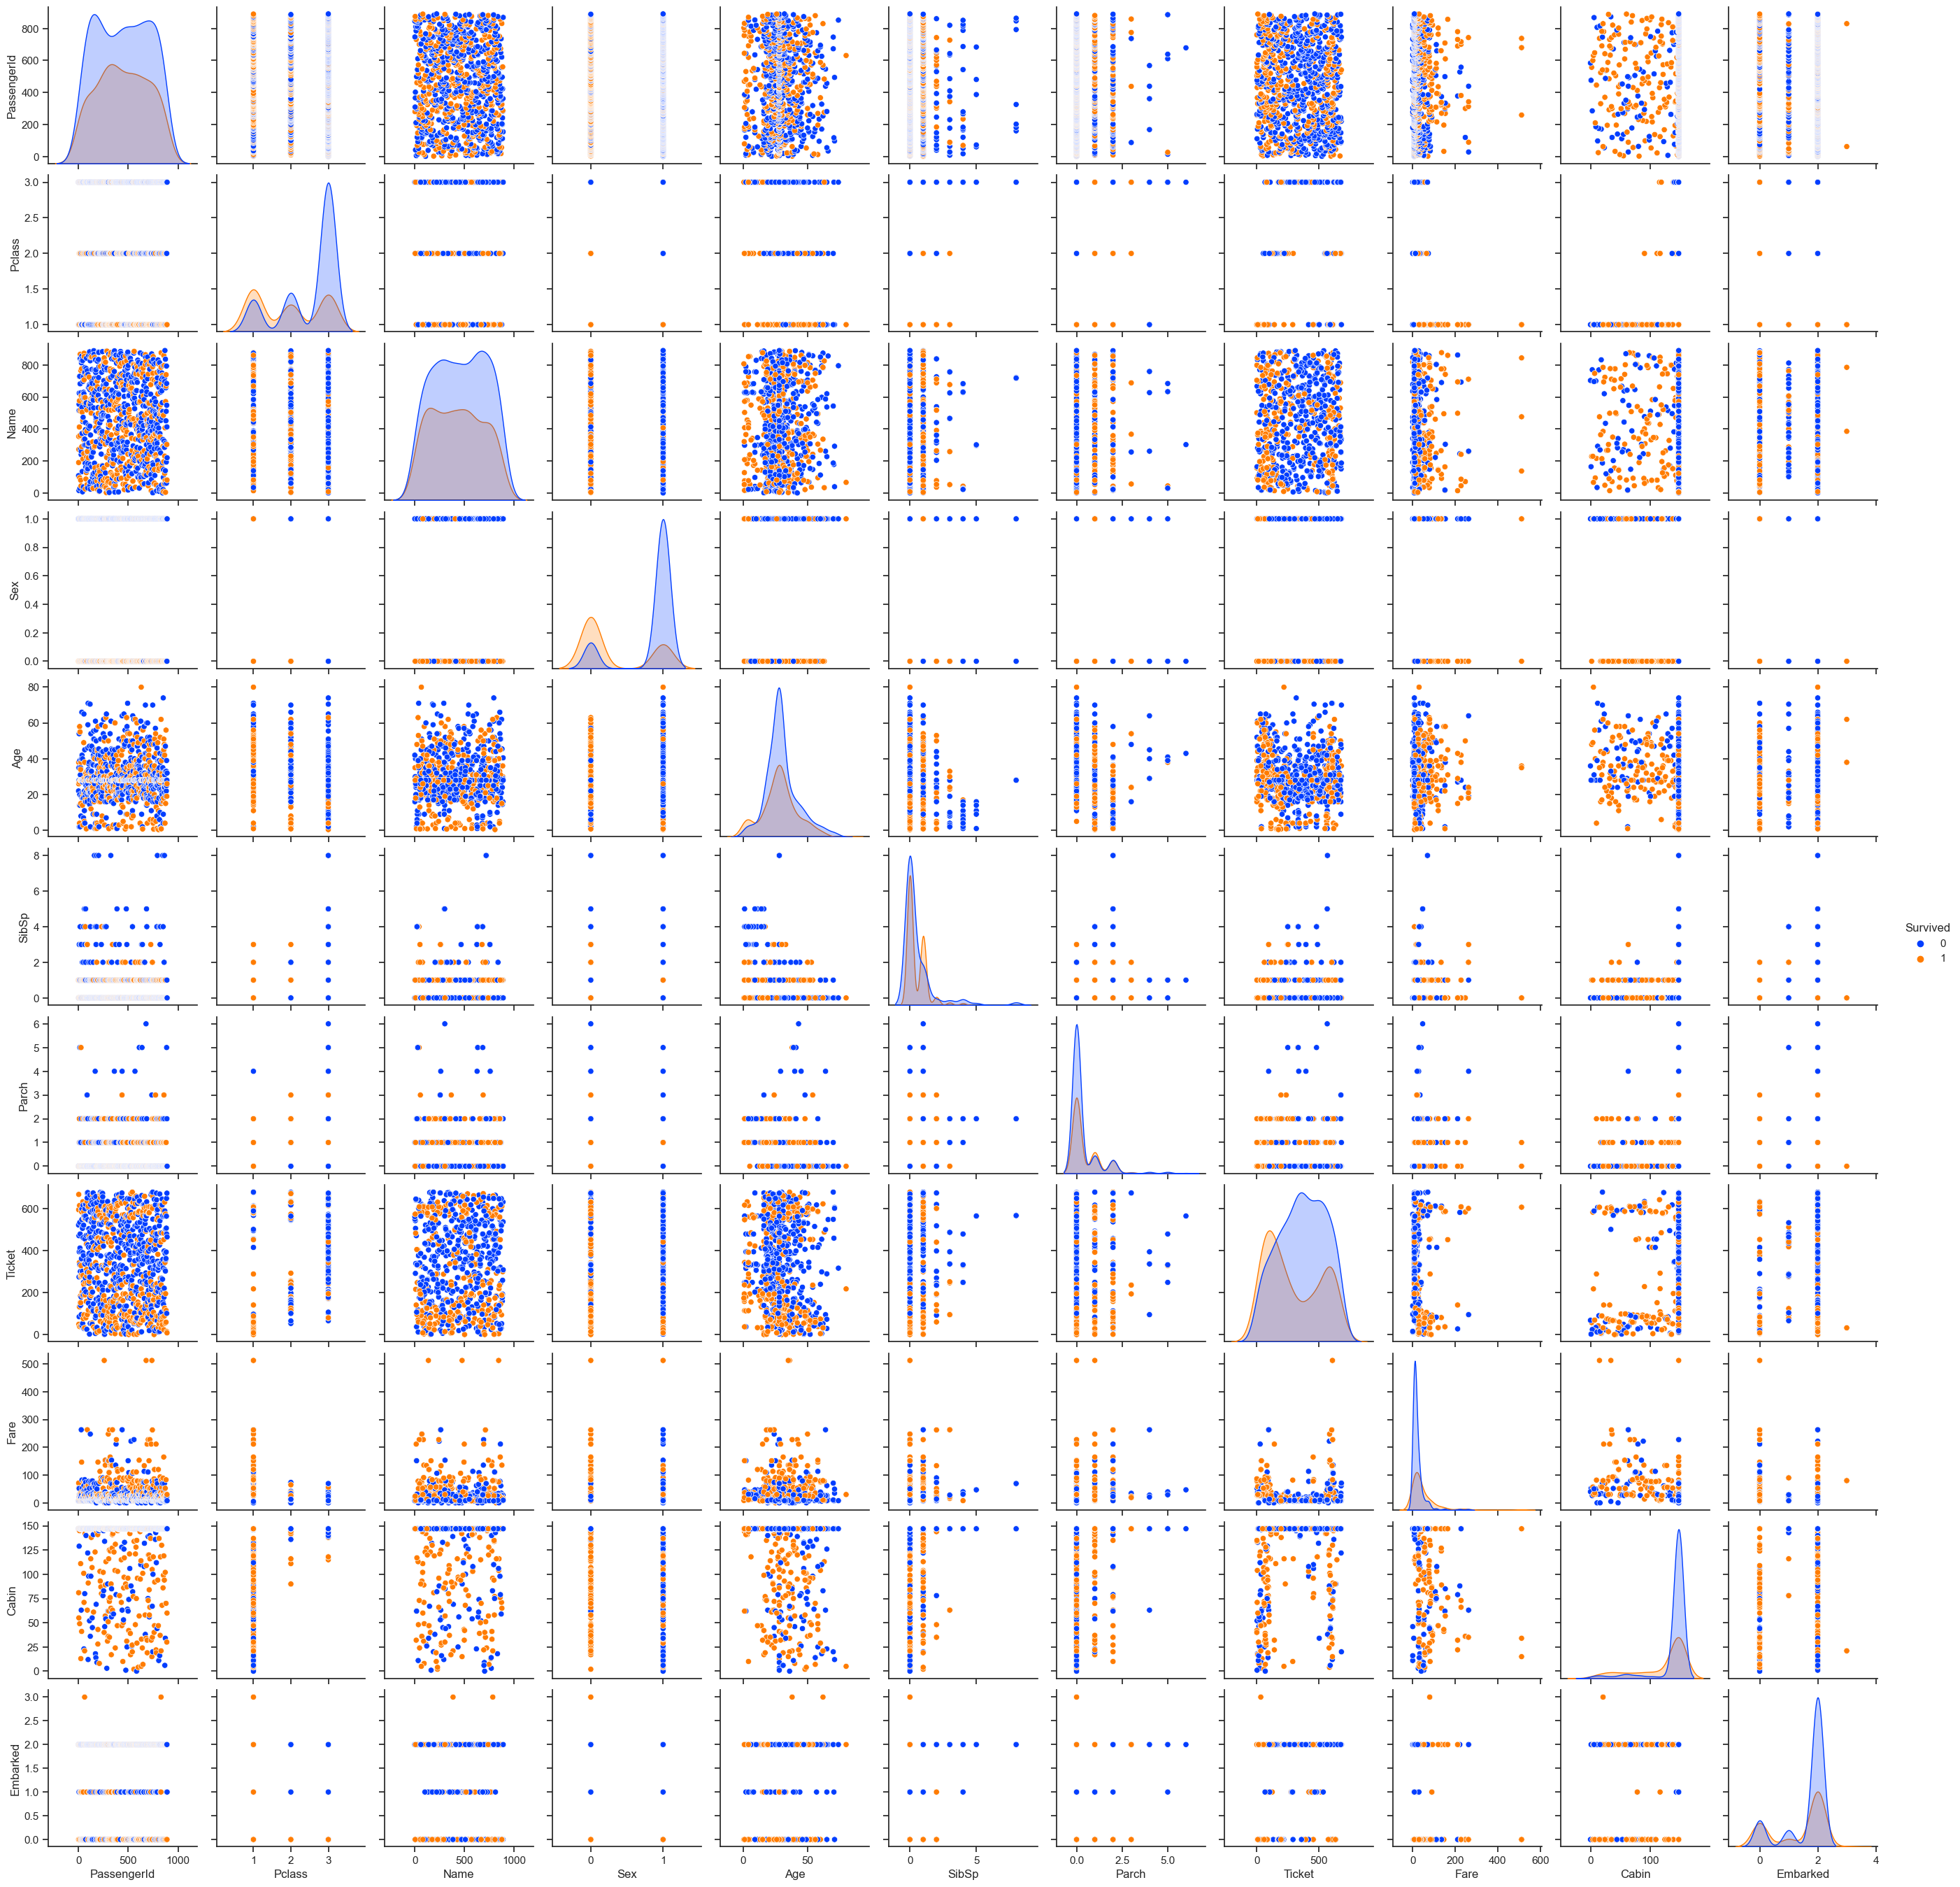

In [50]:
sns.set(style="ticks")
sns.pairplot(data_1,palette='bright',hue='Survived',diag_kind="kde")

# Show the plot
plt.show()

## Feature Engineering

In [323]:
y = data_1['Survived']

In [330]:
data_1.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [331]:
# Now you can use the drop method
X = data_1

In [332]:
print(X)
print(y)


     Pclass  Sex   Age
0         3    1  22.0
1         1    0  38.0
2         3    0  26.0
3         1    0  35.0
4         3    1  35.0
..      ...  ...   ...
886       2    1  27.0
887       1    0  19.0
888       3    0  28.0
889       1    1  26.0
890       3    1  32.0

[891 rows x 3 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [333]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## EDA

## Feature Importance

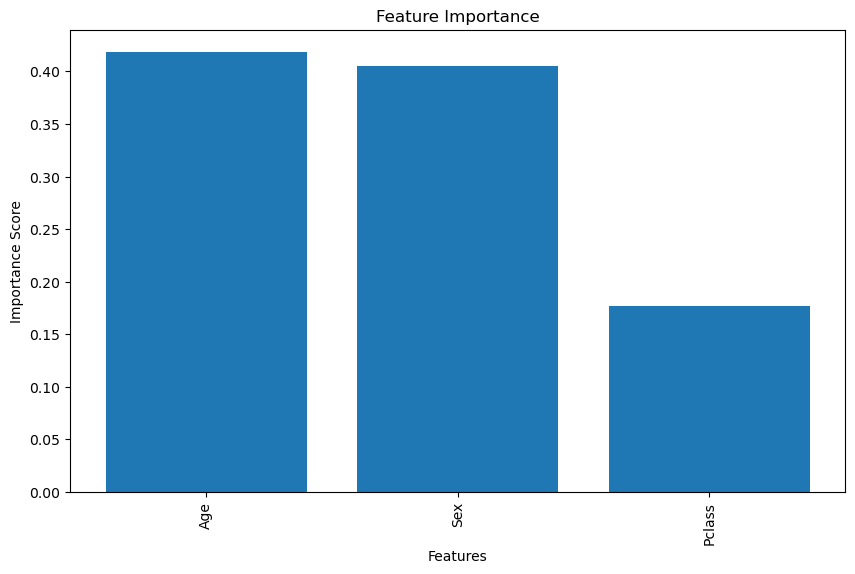

In [334]:
# Load the features   
feature_names = data_1.columns

# Train a RandomForestRegressor 
RandomForestmodel = RandomForestClassifier()
RandomForestmodel.fit(X, y)

# Get feature importances from the model
importances = RandomForestmodel.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


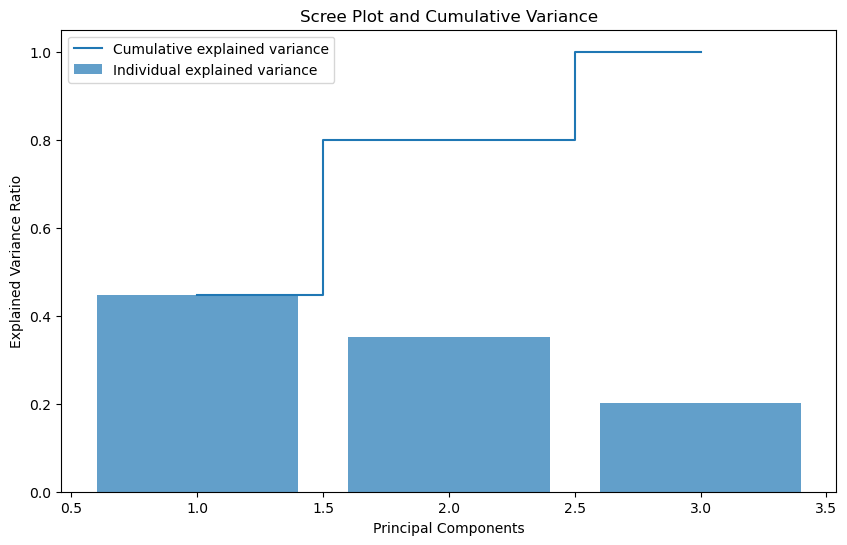

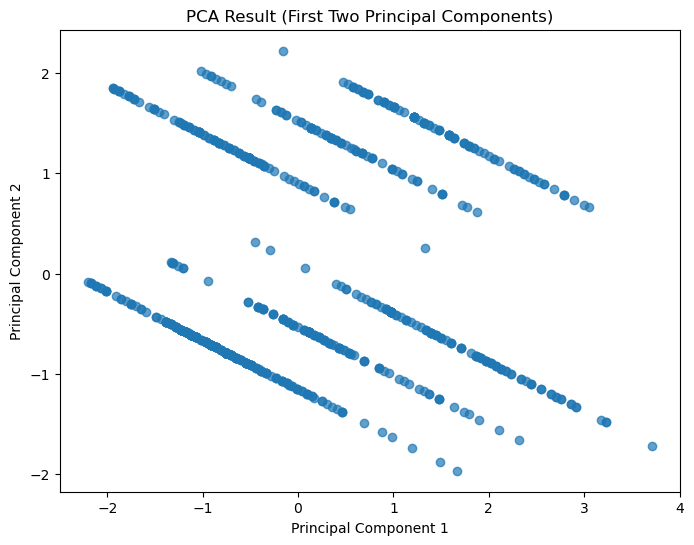

In [335]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_1)

# Create PCA model
pca = PCA()

# Fit the model on the standardized data
pca.fit(scaled_data)

# Transform the data into the new feature space
pca_result = pca.transform(scaled_data)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot and Cumulative Variance')
plt.legend()
plt.show()

# Identify the optimal number of components
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Choose components capturing at least 95% of variance

# Create PCA model with the optimal number of components
pca_optimal = PCA(n_components=num_components)
pca_result_optimal = pca_optimal.fit_transform(scaled_data)

# Visualize the transformed data (for demonstration, you may adjust based on your specific use case)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], alpha=0.7)
plt.title('PCA Result (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Comparision Of Models

### Logistic Regression

In [336]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [337]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[91 14]
 [20 54]]


### Random Forest Classifier

In [338]:
# Initialize the Random Forest Classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [339]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [20 54]]


### Decision Tree Classifier

In [340]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [341]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.776536312849162
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

Confusion Matrix:
 [[89 16]
 [24 50]]


### Support Vector Machine Classifier

In [342]:
# Instantiate the SVM classifier
clf = svm.SVC(kernel='linear')  # You can choose different kernels such as 'poly', 'rbf', etc.

# Fit the classifier on the training data
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [343]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
 [[88 17]
 [22 52]]


### Gaussian Naive Bayes

In [344]:
# Initialize the Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [345]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7541899441340782
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       105
           1       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179

Confusion Matrix:
 [[83 22]
 [22 52]]


### K Nearest Neighbors Classifier

In [346]:
# Initialize the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [347]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
 [[85 20]
 [19 55]]


### Gradient Boosting Classifier

In [348]:
# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Fit the model on the training data
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [349]:
# Make predictions on the test data
y_pred = gbm_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[95 10]
 [24 50]]


### AdaBoost Classifier

In [350]:
# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [351]:
# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[90 15]
 [20 54]]


### CatBoost Classifier

In [352]:
Catboost_model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=6, 
                           loss_function='Logloss', 
                           verbose=True) # Adjust parameters as needed

In [353]:
# Train the model
Catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True) # Adjust parameters as needed

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6378145	test: 0.6391508	best: 0.6391508 (0)	total: 1.43ms	remaining: 1.43s
1:	learn: 0.5954116	test: 0.5984678	best: 0.5984678 (1)	total: 2.23ms	remaining: 1.11s
2:	learn: 0.5615575	test: 0.5666653	best: 0.5666653 (2)	total: 2.58ms	remaining: 858ms
3:	learn: 0.5281488	test: 0.5367169	best: 0.5367169 (3)	total: 3.06ms	remaining: 763ms
4:	learn: 0.5155796	test: 0.5251775	best: 0.5251775 (4)	total: 3.45ms	remaining: 687ms
5:	learn: 0.5018044	test: 0.5094137	best: 0.5094137 (5)	total: 3.84ms	remaining: 636ms
6:	learn: 0.4863363	test: 0.4935452	best: 0.4935452 (6)	total: 4.24ms	remaining: 601ms
7:	learn: 0.4701900	test: 0.4806621	best: 0.4806621 (7)	total: 4.82ms	remaining: 597ms
8:	learn: 0.4598373	test: 0.4732700	best: 0.4732700 (8)	total: 5.21ms	remaining: 574ms
9:	learn: 0.4507258	test: 0.4673020	best: 0.4673020 (9)	total: 5.6ms	remaining: 555ms
10:	learn: 0.4423198	test: 0.4605890	best: 0.4605890 (10)	total: 6.08ms	remaining: 546ms
11:	learn: 0.4389580	test: 0.4562892	best:

In [354]:
# Make predictions on the test data
y_pred = Catboost_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179

Confusion Matrix:
 [[95 10]
 [27 47]]


### XGBoost Classifier

In [355]:
# Create an instance of the XGBoost model
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [356]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [357]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[92 13]
 [17 57]]


## Conclusion:  Based on Accuracy Score, we can infer that  XG Boost Classifier is the best model and Gaussian Naive Bayes is the worst model.